### <center>__MÉTODOS NUMÉRICOS__</center>
#### <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: JONATAS DA SILVA DUARTE__</center>
#### <center>__2° PROJETO: PREDIÇÃO DE DADOS DE SAÚDE USANDO REGRESSÃO LINEAR__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

Sabemos que informações textuais são coletadas em grandes quantidades diariamente juntando “toneladas” das mesmas, com isso, aumenta-se a dificuldade para obter determinados dados/informações. Desta maneira, é preciso ferramentas e técnicas capazes de organizar, pesquisar, entender e resumir a imensa quantidade de informações. 

A partir disso, entra a Modelagem de Tópicos que consiste em uma modelagem estatística para descobrir esses “tópicos” abstratos das informações em questão, servindo, justamente, para estruturar e compreender as coleções de textos, sendo capaz de: descobrir padrões “ocultos” e criar anotações que sirvam para organizar a estrutura, facilitar a pesquisa e até mesmo resumi-la. 

Já os termos SVD e NMF, vem do inglês que significam, respectivamente, Decomposição de Valor Singular e Fatoração de Matriz Não Negativa e consistem em métodos e técnicas usadas na modelagem de tópicos, serão explicados mais para frente. 

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Exemplo do contexto ao qual aplica-se a modelagem de tópicos: dado um documento que fala sobre abelhas, é normal que algumas palavras apareçam mais vezes ou menos vezes, consideramos que “flores” e “mel” seriam mais presentes do que “foguete” e “lava”. Por mais que alguns pontos sejam óbvios, outros não são, e se somarmos isso à uma quantidade massiva de dados?! Seria inviável para nós identificarmos padrões ou deduzirmos algo. 

Também consideramos questões como: problemas com gastos excessivos de tempo e poder computacional, falta de precisão em busca ou análises e até mesmo a perda de potencial sobre os dados disponibilizados. Para isso, aplica-se a modelagem de tópicos, a fim de identificar determinados tópicos, palavras chaves, conjuntos textuais e/ou estruturas, sendo possível analisar, obter insights e viabilizar os resultados, e a partir disso conseguir fazer tarefas e abrir novas possibilidades de aplicações para várias áreas. 

Outra situação exemplar é na área da bioinformática, já que com o rápido acúmulo de dados biológicos, métodos de aprendizado de máquina projetados para automatizar a análise de dados são urgentemente necessários. Nesse momento, os modelos de tópicos têm sido usados para extrair informações de conjuntos de dados de amostras genômicas de câncer e os tópicos são variáveis biológicas latentes a serem inferidas. 

Exemplo de como seria o modelo de tópico nesta situação, onde N = documentos, V = palavras e K = tópicos em um corpo. 

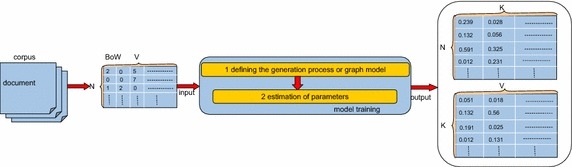

O BoW é a representação do documento, sendo uma matriz de documento de palavra:
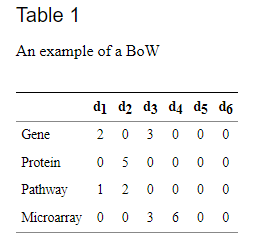
E nela há quatro palavras (gene, proteína, via e microarray) e seis documentos ( d 1 – d 6 ).

(Fonte do exemplo do modelo de tópicos na bioinformática: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5028368/)

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Usaremos duas das principais abordagens da modelagem de tópicos, que foram faladas anteriormente, *Decomposição de Valor Singular (SVD) e Fatoração de Matriz Não Negativa (NMF).*

**SVD** é basicamente um método de decomposição de matrizes para reduzir uma matriz às suas partes constituintes, a fim de simplificar certos cálculos de matrizes subsequentes. Outra forma de expressar é baseado no seguinte pensamento: é esperado que as palavras que aparecem com mais frequência em um tópico apareçam com menos frequência no outro - caso contrário, essa palavra não seria uma boa escolha para separar os dois tópicos. Portanto, esperamos que os tópicos sejam *ortogonais* . Assim, o algoritmo SVD fatora uma matriz em uma matriz com colunas ortogonais e outra com linhas ortogonais (junto com uma matriz diagonal, que contém a importância relativa de cada fator). Vale ressaltar que é uma decomposição exata, já que as matrizes criadas são igualmente grandes à matriz original.

**NMF**, é um método estatístico que nos ajuda a reduzir a dimensão dos corpos de entrada. Internamente, ele usa o método de análise fatorial para dar um peso comparativamente menor às palavras que estão tendo menos coerência. Outra interpretação é, ao invés de restringir nossos fatores a serem ortogonais, restringi-los a serem não negativos. Assim, NMF é uma fatoração de um conjunto de dados não negativos em matrizes não negativas.
Muitas vezes, os fatores positivos serão mais facilmente interpretáveis. Ressaltando, que o algoritmo é uma fatoração não exata que fatora em uma matriz positiva magra e uma matriz positiva curta.

Ao decorrer da implementação também foram usadas mais algumas técnicas, ferramentas e/ou métodos, sendo eles: 

* **TF-IDF** (Frequência de Documento Inverso de Frequência de Tópico) que é uma forma de normalizar as contagens dos termos considerando suas frequências de aparecimento no documento, quanto tempo o tem e qual a raridade daquele termo (comum ou raro);
   
* **SGD** (Descida do Gradiente Estocástico) é um método de otimização muito utilizado e conhecido pelo seu uso no deep learning. Aqui foi usado em conjunto com o NMF, para a descida de gradiente padrão, avaliando a função de perda;
     
* **PyTorch** é uma conhecida estrutura em Python baseada na biblioteca Torch (bastante sugestivo, né?!). Seu funcionamento é semelhante ao numpy, definindo uma classe e usando-a para armazenar e operar matrizes, mas com a aceleração da CPU e o cálculo automático de gradientes;
    
* **Autograd**, que foi usado junto com PyTorch e NMF, é um pacote que fornece classes e funções que implementam a diferenciação automática de funções de valor escalar arbitrário.


<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [1]:
## Importando o que será necessário
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

O conjunto de dados 'Newsgroups' consistem em grupos de discussão na Usenet e inclui 18.000 postagens de grupos de notícias com 20 tópicos

Para configuração dos dados, teremos o 'Scikit Learn' que vem com vários conjuntos de dados integrados, além de utilitários de carregamento para carregar vários conjuntos de dados externos padrão.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [5]:
np . array ( newsgroups_train . target_names )[ newsgroups_train . target [: 3 ]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [6]:
from sklearn.feature_extraction.text  import  CountVectorizer ,  TfidfVectorizer

Agora, arrumamos o nosso conjunto de dados em uma variavel e também retiramos algumas palavras que não ajudam tanto para a interpretação, são chamadas de stop-words

In [7]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [8]:
vocab = np.array(vectorizer.get_feature_names())

In [9]:
vocab.shape

(26576,)

In [10]:
## Visualizando
vocab[6000:6020]

array(['cleveland', 'clever', 'cleverer', 'cleverly', 'cli',
       'cliberbuiten', 'clibstatus', 'clibsucces', 'cliche', 'click',
       'clicking', 'clicks', 'client', 'clients', 'cliff', 'climate',
       'climatic', 'climatologist', 'climbed', 'clime'], dtype='<U80')

Seguindo, aplicaremos o conceito, já comentado, de SVD

In [11]:
## análise do tempo
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 1min 18s


In [12]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [13]:
## Nossa função respónsavel por mostrar os tópicos modelados
num_top_words=10

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [14]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative salvadorans ahhh',
 'edu graphics data space pub mail 128 3d ray nasa',
 'space jesus launch god people satellite matthew atheists does time',
 'space launch satellite commercial nasa satellites market year data jpeg',
 'jpeg graphics space pub edu ray mail send launch file',
 'jesus matthew prophecy messiah psalm isaiah david said lord israel',
 'launch commercial satellite market image services satellites launches year communications',
 'data available nasa ftp grass anonymous contact gov vertex sgi',
 'atheists god religious atheism religion believe belief atheist image probe',
 'probe data surface moon mars probes lunar launch orbit venus']

Mostrando agora com o uso do conceito de NMF

In [15]:
m,n=vectors.shape
d=5  # num topics

In [16]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [17]:
show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

Aplicando TF-IDF (Frequência de Documento Inverso de Frequência de Tópico) para normalizar as contagens dos termos considerando suas frequências de aparecimento no documento

In [18]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [19]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [20]:
show_topics(H1)

['people don think just like objective say morality know moral',
 'graphics thanks files image file program windows know format ftp',
 'space nasa launch shuttle orbit moon lunar earth station data',
 'ico bobbe tek beauchaine bronx manhattan sank queens vice blew',
 'god jesus bible believe christian atheism does belief faith christians']

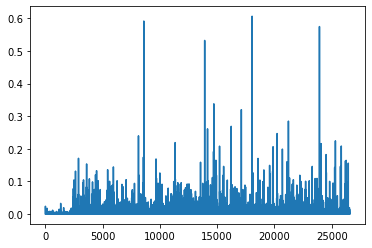

In [21]:
plt.plot(clf.components_[0])

In [22]:
clf.reconstruction_err_

43.71292605795278

Aplicando SGD (Descida do Gradiente Estocástico) juntamento com o NMF

In [23]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [24]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [25]:
show_topics(H1)

['jpeg image gif file color images format quality version files',
 'edu graphics pub mail 128 ray ftp send 3d com',
 'space launch satellite nasa commercial satellites year market data earth',
 'jesus god people matthew atheists does atheism said just believe',
 'image data available software processing ftp edu analysis images display']

In [26]:
## Construindo as funções necessárias
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [27]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [28]:
report(vectors_tfidf, W, H)

44.42660368005924 1.803799607796246e-06 4.568318322445679e-08 0 0


In [29]:
upd(vectors_tfidf,W,H,lr)

In [30]:
report(vectors_tfidf, W, H)

44.4186978564847 -0.0009860808074789455 -6.523759892606572e-05 138 311


In [31]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.413076622713604 -0.0006466899534712787 -6.166361512021419e-05 105 293
44.37490609424368 -0.00042688003973274024 -5.2721340295803565e-05 55 494
44.34650819465422 -0.00021593709706389984 -7.341373803652652e-05 24 983
44.31486395009168 -0.00012565144533918456 -8.44359281014018e-05 31 1535
44.28003410244978 -0.00010914310650257843 -0.00010534989980739191 35 2230


In [32]:
# Conseguimos visualizar
show_topics(H)

['god don people space like think just know does time',
 'don space god people like just think know good jesus',
 'god people don space know does just think say like',
 'space just don like god people does know think say',
 'space god people think don just does like know time']

Construindo nossa SVD randomizado para aplicar

In [33]:
from scipy import linalg

In [34]:
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

In [35]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [36]:
u, s, v = randomized_svd(vectors, 5)

In [37]:
%time u, s, v = randomized_svd(vectors, 5)

Wall time: 4.05 s


In [38]:
# dividindo em 5 listas
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [39]:
# os tópicos relacionnados dentro da cada lista
show_topics(v)

['jpeg image edu file graphics images gif data pub ftp',
 'jpeg gif file color quality image jfif format bit version',
 'space jesus launch god people satellite matthew atheists does time',
 'space launch satellite commercial nasa satellites market year data jpeg',
 'image data processing analysis software available tools display tool user']

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

Agora, aplicando a implementação em um caso de uso com os dados retirados de manchetes.  Fonte: https://www.kaggle.com/therohk/million-headlines 

In [40]:
## Fazendo os imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [42]:
## Aqui pegamos o nnosso conjunto de dados
corpo_texto = pd.read_csv('abcnews-date-text.csv')
corpo_texto = corpo_texto['headline_text'].tolist()[:5000]
corpo_texto

['aba decides against community broadcasting licence',
 'act fire witnesses must be aware of defamation',
 'a g calls for infrastructure protection summit',
 'air nz staff in aust strike for pay rise',
 'air nz strike to affect australian travellers',
 'ambitious olsson wins triple jump',
 'antic delighted with record breaking barca',
 'aussie qualifier stosur wastes four memphis match',
 'aust addresses un security council over iraq',
 'australia is locked into war timetable opp',
 'australia to contribute 10 million in aid to iraq',
 'barca take record as robson celebrates birthday in',
 'bathhouse plans move ahead',
 'big hopes for launceston cycling championship',
 'big plan to boost paroo water supplies',
 'blizzard buries united states in bills',
 'brigadier dismisses reports troops harassed in',
 'british combat troops arriving daily in kuwait',
 'bryant leads lakers to double overtime win',
 'bushfire victims urged to see centrelink',
 'businesses should prepare for terrorist a

In [43]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(corpo_texto).todense() # (documents, vocab)
vectors.shape

(5000, 6902)

In [44]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 1min 33s


In [45]:
vocab = np.array(vectorizer.get_feature_names())

In [46]:
vocab.shape

(6902,)

In [47]:
vocab[1000:1030]

array(['butler', 'butt', 'butterflies', 'butterfly', 'button', 'buy',
       'buys', 'byo', 'bypass', 'cabin', 'cabinet', 'caboolture',
       'cadell', 'cafe', 'cafeteria', 'cafl', 'cairns', 'calculation',
       'calder', 'caledonia', 'cali', 'california', 'called', 'calleri',
       'calling', 'callous', 'calls', 'calms', 'caloundra', 'caltex'],
      dtype='<U16')

In [48]:
show_topics(Vh[:10])

['police man court murder iraq govt probe charged new face',
 'police man murder probe charged court stabbing missing charge face',
 'govt police nsw vic new plan qld sa wa probe',
 'police iraq probe investigate war pm fatal missiles cannabis road',
 'govt iraq says police vic nsw man sa war missiles',
 'new govt iraq man resolution vic war murder sa zealand',
 'says cup world war north korea anti court south minister',
 'rain water iraq man drought new restrictions war farmers world',
 'man council says charged security hospital death missing new north',
 'cup world council final iraq win australia injured claims americas']

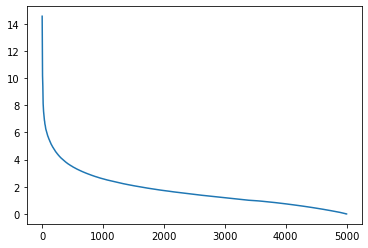

In [49]:
plt.plot(s);

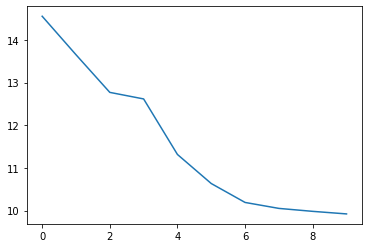

In [50]:
plt.plot(s[:10])

Agora com NMF

In [51]:
m,n=vectors.shape
d=5 

In [52]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [53]:
show_topics(H1)

['police probe investigate death car murder wa fatal crash search',
 'iraq war says pm missiles council howard downer resolution security',
 'govt nsw vic qld plan sa says wa claims nt',
 'man court murder charged face charge jailed stabbing missing charges',
 'new resolution plan council zealand water high aust world cup']

TF-IDF

In [54]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(corpo_texto) # (documents, vocab)

In [55]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [56]:
show_topics(H1)

['man court charged murder face stabbing charge missing attempted jailed',
 'iraq war says new resolution pm missiles howard council downer',
 'police probe investigate death car fatal crash search stabbing victim',
 'govt nsw vic qld new plan sa wa hospital health',
 'rain water restrictions drought farmers council boost hope offers qld']

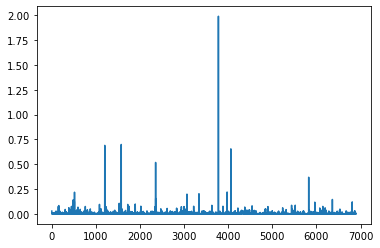

In [57]:
plt.plot(clf.components_[0])

In [58]:
clf.reconstruction_err_

70.09078178028912

SGD com NMF

In [59]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [60]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [61]:
show_topics(H1)

['police probe investigate death car murder wa fatal crash search',
 'iraq war says pm missiles council howard downer resolution security',
 'govt nsw vic qld plan sa says wa claims nt',
 'man court murder charged face charge jailed stabbing missing charges',
 'new resolution plan council zealand water high aust world cup']

In [66]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [67]:
report(vectors_tfidf, W, H

70.69278520585402 2.5285272671266116e-07 1.6484474642726867e-07 0 0


In [69]:
upd(vectors_tfidf,W,H,lr)

In [70]:
report(vectors_tfidf, W, H)

70.69021258683777 -0.00014375879896130495 -0.00018308769338573852 43 92


In [72]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

70.68775533565038 -0.00016265632469697724 -0.00019212923219078418 30 104
70.66563115145213 -0.00011493381617517728 -0.00014401844285030527 25 297
70.64356654702053 -0.00022825390279642324 -0.00016410594521694985 43 579
70.6210164960602 -0.00018822932909538554 -0.00018042894377448248 75 828
70.60036419905308 -0.00020433551384936585 -0.00020361020831953305 113 1090


In [71]:
show_topics(H)

['opera extinction brochure mauresmo 31 passes suitcase worlds investigations ivory',
 'attendant mp apartments arrests senate mates assault money dole problem',
 'prompt telstra militias quarter pointless agreement win extreme coasters eckstein',
 'finding threatening croatia orders heroes queensland prepare able reuse tipping',
 'unemployment burmese canadian passengers town editor military wwf rush carrs']

Com a nossa implementação do SVD randomizado

In [73]:
u, s, v = randomized_svd(vectors, 5)

In [74]:
%time u, s, v = randomized_svd(vectors, 5)

Wall time: 2.45 s


In [75]:
u.shape, s.shape, v.shape

((5000, 5), (5,), (5, 6902))

In [76]:
show_topics(v)

['ongoing dominance telstras competitiveness wines wound gartner derelict freighter nataus',
 'police man murder probe charged missing court stabbing car face',
 'man iraq court charged face murder war jailed charge faces',
 'police iraq probe investigate war pm fatal cannabis missiles road',
 'govt iraq police nsw vic says man war sa missiles']

Assim, concluímmos o nosso caso de teste e, commo vimos no exemplo da impleentação,o SVD randomizado que foi construido, demonstra uma as melhores performances, chegando a mmetade do tempo das demais. Então pra essas situações, seria uma ótima abordagem